# Notebook on algorithmic bias for the lecture **Modalities of Data Bias**

*Author: Dr. Hryhorii Chereda*

These exercises are rather demonstrative and shaped as a tutorial to provide an understanding of algorithmic bias.

In [25]:
""" 
Importing necessary python modules.
"""

import numpy as np
import math
import random
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression 

# to display graphs interactively
# %matplotlib widget 
%config InlineBackend.figure_format = 'svg' # to increase the quality of plots 

import scipy.stats as st

## Algorithmic bias can be introduced by a predictive model. Predictive model is trained on a single dataset generated from the joint probability distribution P(x,t), where x and t serve as input and output to a predictive model.
## Here we provide an example by generating synthetic datasets for the clarity. We will visualize the probability distribution P(x,t), from which datasets are generated.
## The datasets are generated according to the diagram below and are used to train predictive models. 

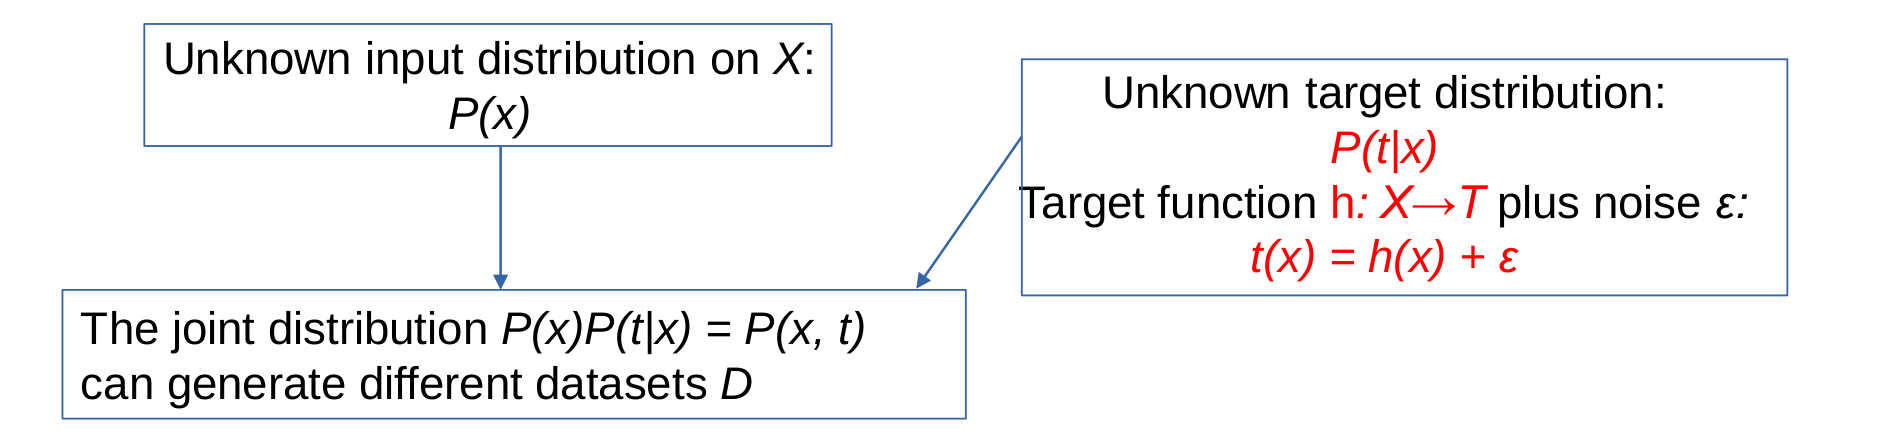

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("./Diagrams/generating_dataset_diagram.png")
# In this excercise, the distribution P(x) is known (uniform).

# The cell below is going to generate a single dataset.
**In our case, p(x) = 1 on the interval 0<x<1**

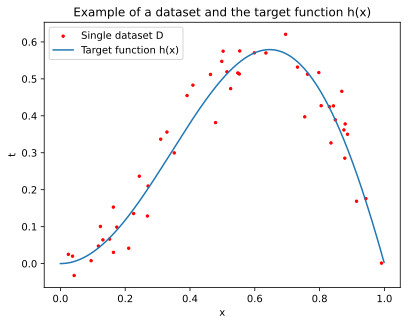

In [3]:
"""
The code in this cell performs dataset generation.
"""

a = 0 # left limit of the interval we work on
b = 1 # right limit of the interval we work on
mean = 0
scale = 0.05 # for normal distribution
n = 50 # number of data points

x = np.random.uniform(a, b, size=n) # creating the input data, here the distribution P(x) is known (uniform).

def noise():
    """
    Generates gaussian noise.
    """
    eps = np.random.normal(mean, scale, size = n)
    return eps

def h_target(x):
    """
    This is our groundtruth target function.
    """
    h = x * np.sin(math.pi * x)
    return h



t = h_target(x) + noise()
X = np.copy(x)
T = np.copy(t)

# !!!
# uncomment to clear the axes
# plt.cla()

fig = plt.figure("Example of a dataset and the target function h(x)")
plt.cla() # clearing the axes
ax = fig.gca()# plt.cla()
ax.set_title("Example of a dataset and the target function h(x)")
ax.scatter(x, t, c = "red", s = 6,  label='Single dataset D')
grid_x = np.arange(a, b, step=0.001, dtype = np.float64)
ax.plot(grid_x, h_target(grid_x), label="Target function h(x)")
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.legend()
#ax.setla
plt.show()

In [4]:
"""
Generating 20 datasets and merging them to estimate the density of the joint probability
distribution p(x, y).
"""

number_of_datasets = 20

list_x = []
list_t = []
last_t = []
last_x = []
for _ in range(number_of_datasets):
    x = np.random.uniform(a, b, size=n)
    t = h_target(x) + noise()
    list_x.extend(x)
    list_t.extend(t)
    
print("Number of data points in the argument:", len(list_x))
print("Number of data points in the target:", len(list_t))

Number of data points in the argument: 1000
Number of data points in the target: 1000


# The cells below perform visualization of probability density estimated on 20 generated datasets combined.

In [5]:
"""
Estimating joint probability density function p(x,t).
"""

x = list_x
y = list_t

# ranges to estimate the probability density function
xmin, xmax = -0.1, 1.1
ymin, ymax = -0.1, 0.7

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:1200j, ymin:ymax:800j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

**Two cell below generates two plots.   
First one visualizes probability density esimation, and the second one allows to visualize the density of conditional distribution at fixed *x_selected*.**

In [6]:

x_selected = 0.4

"""
In this cell we visualize the joint distribution p(x,t).
In the next cell we visualize how the conditional (target) distribution looks like:
For that we fix x = x_selected and look at the slice of the joint density p(x=x_selected, t) to visualize conditional (target) distribution.
p(t|x=x_selected) = p(x=x_selected, t) / p(x=x_selected)  
"""

c_map = "Blues"
fig = plt.figure("Density of the joint probability distribution p(x, t)")
plt.cla()
ax = fig.gca()
ax.set_title("Density of the joint probability distribution p(x, t)")
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap=c_map, levels=20)
## Or kernel density estimate plot instead of the contourf plot
ax.imshow(np.rot90(f), cmap=c_map, extent=[xmin, xmax, ymin, ymax])
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.scatter(list_x, list_t, c = "red", s = 2, label="datapoints from 20 datasets")
ax.axvline(x=x_selected,  color = "green", label="section at x={}".format(x_selected))
ax.legend()
plt.show()

# The green line on the plot above slices the joint probability distribution. The plot below shows the shape of the slice, visualising  conditional density p(t|x=0.4). 
By default *x_selected = 0.4*.   
The cell below visualizes the density of the conditional distribution p(t|x=*x_selected*).

(1200, 800) (800,)


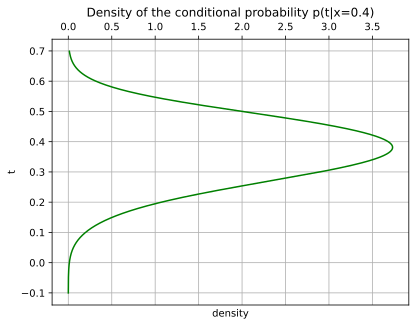

In [8]:
"""
Let us take a look at the density of the conditional (target) distribution:
p(t|x=0.4) = p(x=0.4, t) / p(x=0.4)  
"""

grid_t = np.arange(ymin, ymax, step=0.001, dtype = np.float64)
#grid_t = ymin:ymax:1000j
print(f.shape, grid_t.shape)

def convert_x_to_index(x, xmin=-0.1, xmax=1.1):
    """
    Converts "x" coordinate to the index inside of two-dimensional array containing density values.
    returns: computed index
    """
    if xmin<x<=xmax:
        return int((x - xmin)*1e+3 - 1)
    else:
        return 0

# !!!
# uncomment to clear the axes
# plt.cla()
fig = plt.figure("Density of the conditional probability p(t|x={})".format(x_selected))
ax = fig.gca()
ax.set_title("Density of the conditional probability p(t|x={})".format(x_selected))
ax.xaxis.tick_top()
ax.plot(f[convert_x_to_index(x=x_selected), ], grid_t, color = "green") # index 500 in "f" corresponds to x = 0.4
ax.set_xlabel('density')
ax.set_ylabel('t')
ax.grid(True)
plt.show()

# The part of the tutorial below fits models (linear and polynomial) to data and visualizes algorithmic bias.


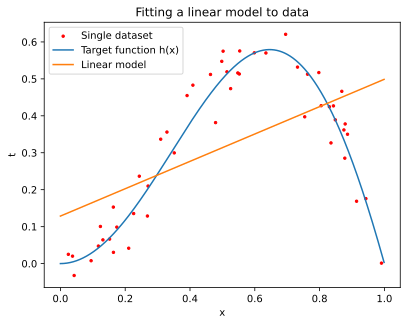

In [9]:
""" 
Fitting linear regression to data.
"""
reg = LinearRegression()
reg = reg.fit(X.reshape(-1,1), T)
y_pred = reg.predict(grid_x.reshape(-1,1))

# !!!
# uncomment to clear the axes

fig = plt.figure("Fitting a linear model to data")
plt.cla()
ax = fig.gca()
ax.set_title("Fitting a linear model to data")
ax.scatter(X, T, c = "red", s = 6, label = "Single dataset")
grid_x = np.arange(a, b, step=0.001, dtype = np.float64)
ax.plot(grid_x, h_target(grid_x), label = "Target function h(x)")
ax.plot(grid_x, y_pred, label = "Linear model")
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.legend()
plt.show()

# Algorithmuc bias shows how much an average model deviates from the the target function, and variance shows how much trained models deviate from each other. We can estimate algorithmic bias (point-wise) by averaging outputs of models trained on different datasets coming from the same generating distribution.

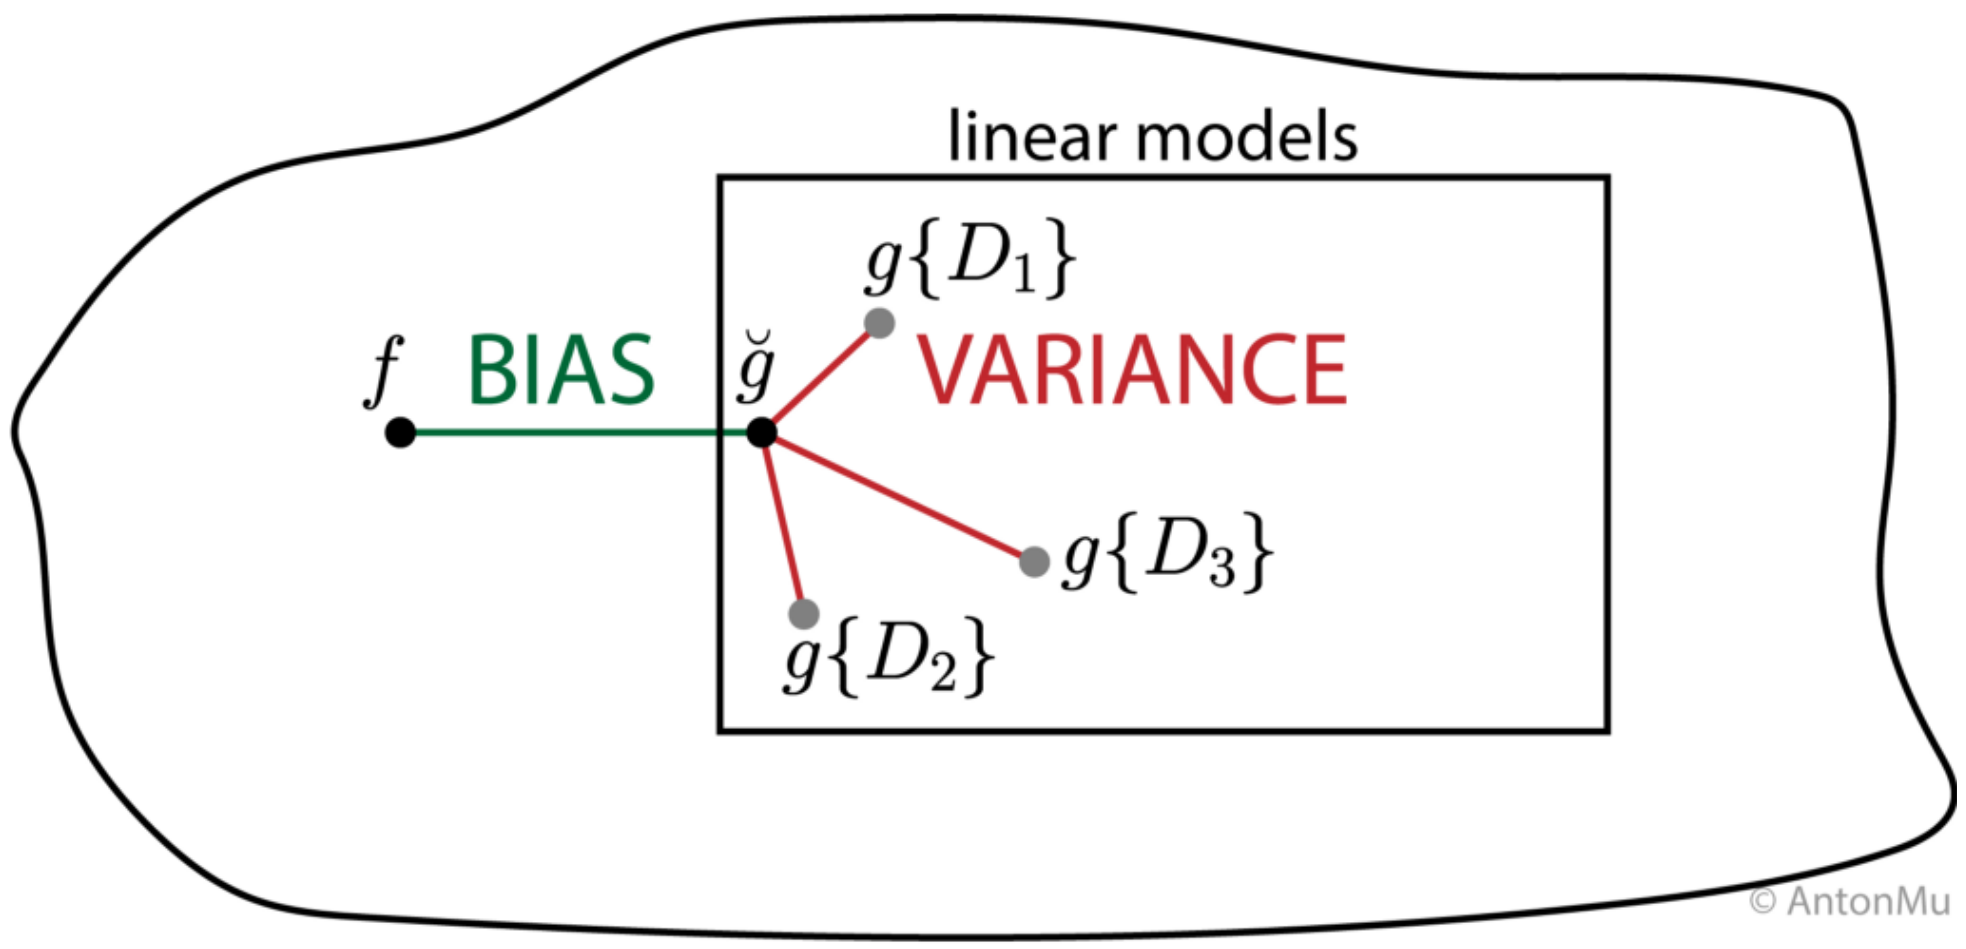

In [10]:
Image("./Diagrams/bias_variance_diagram.png")
# from https://laptrinhx.com/bias-variance-tradeoff-explained-2889714375/

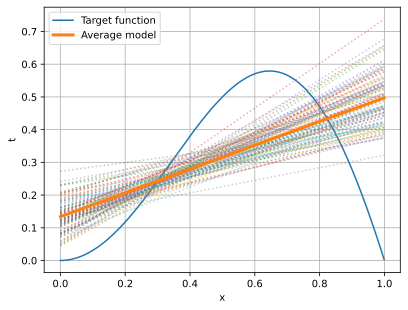

In [26]:
""" 
Plotting preditions of different linear models and of the average model.
"""

# !!!
# uncomment to clear the axes
# plt.cla()
fig = plt.figure("Averaged linear model")
plt.cla()
ax = fig.gca()
ax.plot(grid_x, h_target(grid_x), label = "Target function")

number_of_datasets = 100 #20

average_line = np.zeros(grid_x.shape)

# generating several datasets
for _ in range(number_of_datasets):
    x = np.random.uniform(a, b, size=n)
    t = h_target(x) + noise()
    reg = LinearRegression()
    reg = reg.fit(x.reshape(-1,1), t)
    y_pred = reg.predict(grid_x.reshape(-1,1))
    average_line = average_line + y_pred
    ax.plot(grid_x, y_pred, linestyle = ":", alpha = 0.4)
    # ax.scatter(x, t, c = "red", s = 6)
    
average_line = average_line / number_of_datasets
ax.plot(grid_x, average_line, linestyle = "-", linewidth = 3, label = "Average model")
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.legend()
plt.show()
    

# The cell below plots bias^2

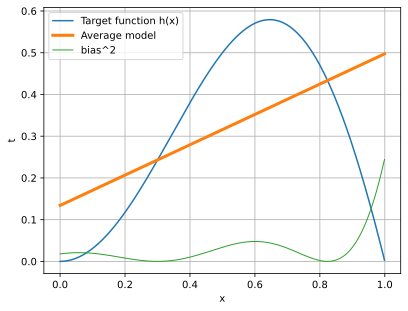

In [27]:
"""
Plotting the squared bias.
"""
bias = average_line - h_target(grid_x)


# !!!
# uncomment to clear the axes
# plt.cla()
fig = plt.figure("Bias^2 shows the deviation of the average model from the target function")
plt.cla()
ax = fig.gca()
ax.plot(grid_x, h_target(grid_x), label = "Target function h(x)")
ax.plot(grid_x, average_line, linestyle = "-", linewidth = 3, label = "Average model")
ax.plot(grid_x, bias*bias, linestyle = "-", linewidth = 1, label = "bias^2")
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.legend()
plt.show()

# The next cells demonstrate bias and variance estimates for polynomial regression.

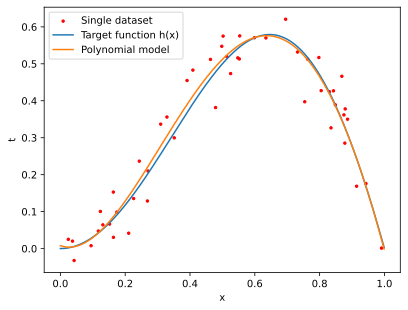

In [23]:
""" 
Performing polynomial regression on the data generated the same way as before.
"""
K = 4 # degree of the polynom

def get_cheb_polynoms(X, K):
    """
    Compute Chebyshew polynomials with given power K over data points X.
    """
    K = K+1
    Xt = np.empty((K, X.shape[0]), np.float64)
    Xt[0, ...] = 1
    if K > 1:
        Xt[1, ...] = X
        # Xt_k = 2 L Xt_k-1 - Xt_k-2.
    for k in range(2, K):
        Xt[k, ...] = 2 * X * Xt[k-1, ...] - Xt[k-2, ...]
        # Xt[k, ...] = X * Xt[k-1, ...]        
    return Xt

Xt = get_cheb_polynoms(X, K).transpose()

reg = LinearRegression(fit_intercept = False)
reg = reg.fit(Xt, T)

y_pred = reg.predict(get_cheb_polynoms(grid_x, K).transpose())
                     
fig = plt.figure("Fitting a polynomial model to data")
plt.cla()
ax = fig.gca()
ax.scatter(X, T, c = "red", s = 6, label = "Single dataset")
grid_x = np.arange(a, b, step=0.001, dtype = np.float64)
ax.plot(grid_x, h_target(grid_x), label = "Target function h(x)")
ax.plot(grid_x, y_pred, label = "Polynomial model")
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.legend()
plt.show()

## The cell below will visualize bias estimates for the polynomial model.
# The polynomial model (k=4) fits to our data better than linear model since it produces lower algorithmic bias.

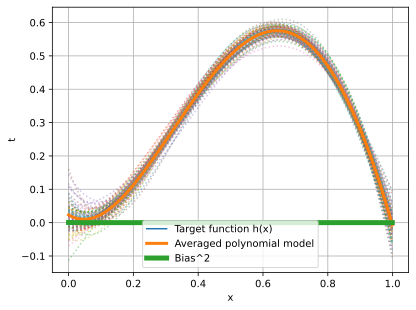

In [28]:
"""
Plotting how different polynomial models deviate from the average model and from the groundtruth h(x).
"""

# !!!
# uncomment to clear the axes
# plt.cla()
fig = plt.figure("Deviation of averaged polynomial model from the target function h(x)")
plt.cla()
ax = fig.gca()

number_of_datasets = 100

ax.plot(grid_x, h_target(grid_x), label = "Target function h(x)")
average_line = np.zeros(grid_x.shape)
for _ in range(number_of_datasets):
    x = np.random.uniform(a, b, size=n)
    t = h_target(x) + noise()
    Xt = get_cheb_polynoms(x, K).transpose()
    reg = LinearRegression(fit_intercept = False)
    reg = reg.fit(Xt, t)
    y_pred = reg.predict(get_cheb_polynoms(grid_x, K).transpose())

    average_line = average_line + y_pred
    ax.plot(grid_x, y_pred, linestyle = ":", alpha = 0.4)
    # ax.scatter(x, t, c = "red", s = 6)
    
average_line = average_line / number_of_datasets

# computing the bias
bias = average_line - h_target(grid_x)

ax.plot(grid_x, average_line, linestyle = "-", linewidth = 3, label = "Averaged polynomial model")
ax.plot(grid_x, bias*bias, linestyle = "-", linewidth = 5, label = "Bias^2")
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.legend()
plt.show()